In [276]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [277]:
#state wise data set
df1 = pd.read_csv('crime_by_state_rt.csv')   #DataFrame original

In [278]:
df =df1.set_index('Year')

In [279]:
df.head(5)   #dataframe with year index

,STATE/UT,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
Year,,,,,,,,,,,
2001,ANDHRA PRADESH,45,69,22,3,2,6,518,950,312,1006
2002,ANDHRA PRADESH,60,98,18,0,4,12,568,830,459,1336
2003,ANDHRA PRADESH,33,79,27,1,15,4,615,1234,165,1386
2004,ANDHRA PRADESH,39,66,28,0,7,20,474,1319,68,1234
2005,ANDHRA PRADESH,37,74,21,0,0,9,459,1244,61,1212


In [280]:
df['STATE/UT'].nunique()

35

In [281]:
df.isnull().any()

#no NUll and missing values in dataset

STATE/UT                                False
Murder                                  False
Assault on women                        False
Kidnapping and Abduction                False
Dacoity                                 False
Robbery                                 False
Arson                                   False
Hurt                                    False
Prevention of atrocities (POA) Act      False
Protection of Civil Rights (PCR) Act    False
Other Crimes Against SCs                False
dtype: bool

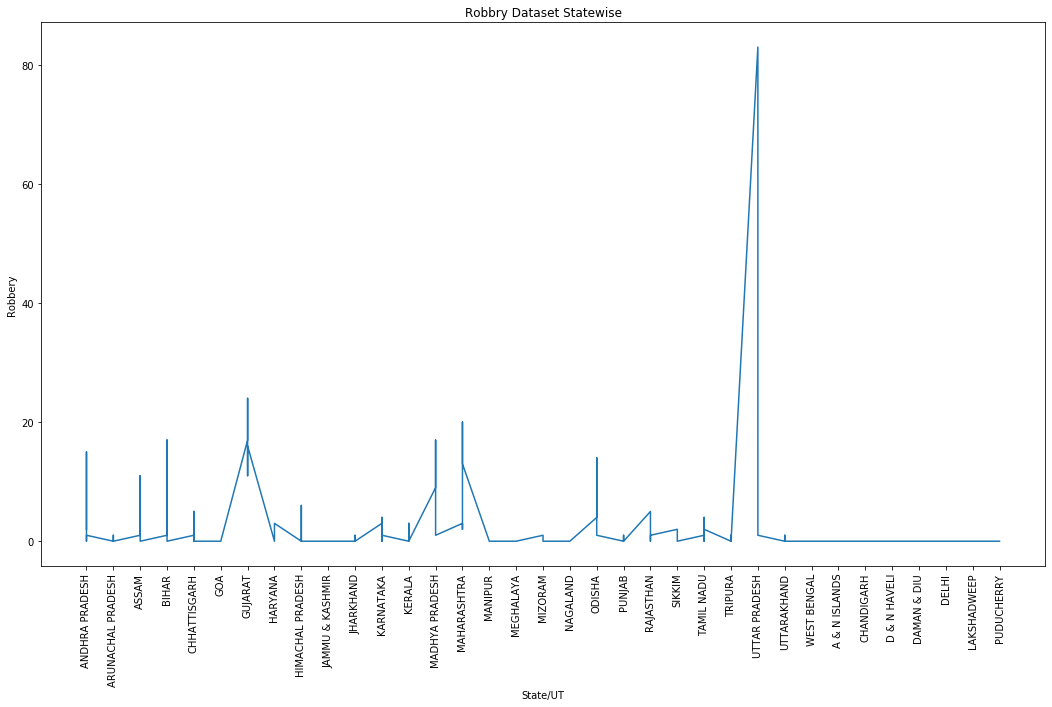

In [282]:
plt.figure(figsize=(18,10))
plt.plot(df['STATE/UT'],df['Robbery'])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Robbery')
plt.title('Robbry Dataset Statewise')
plt.show()

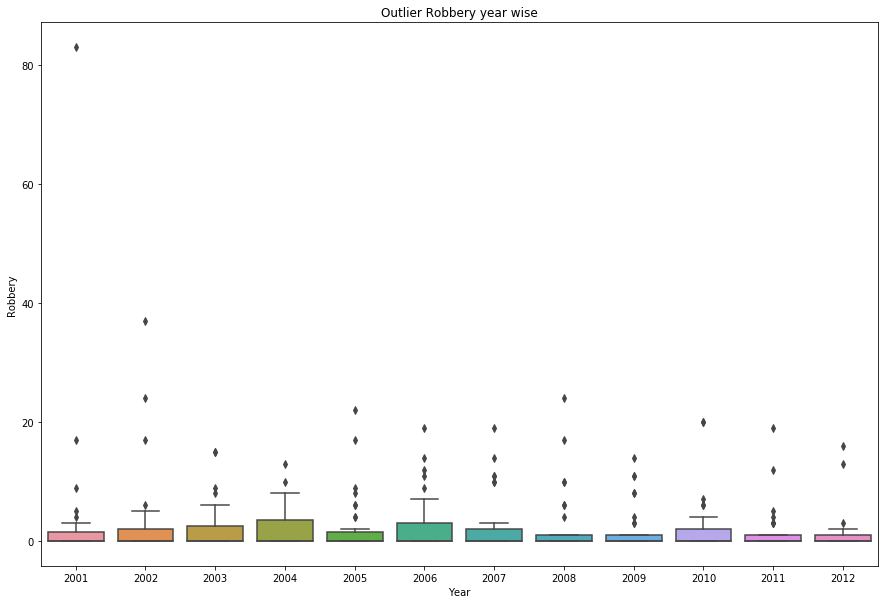

In [283]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Year", y="Robbery", data=df1).set_title('Outlier Robbery year wise')
plt.show()

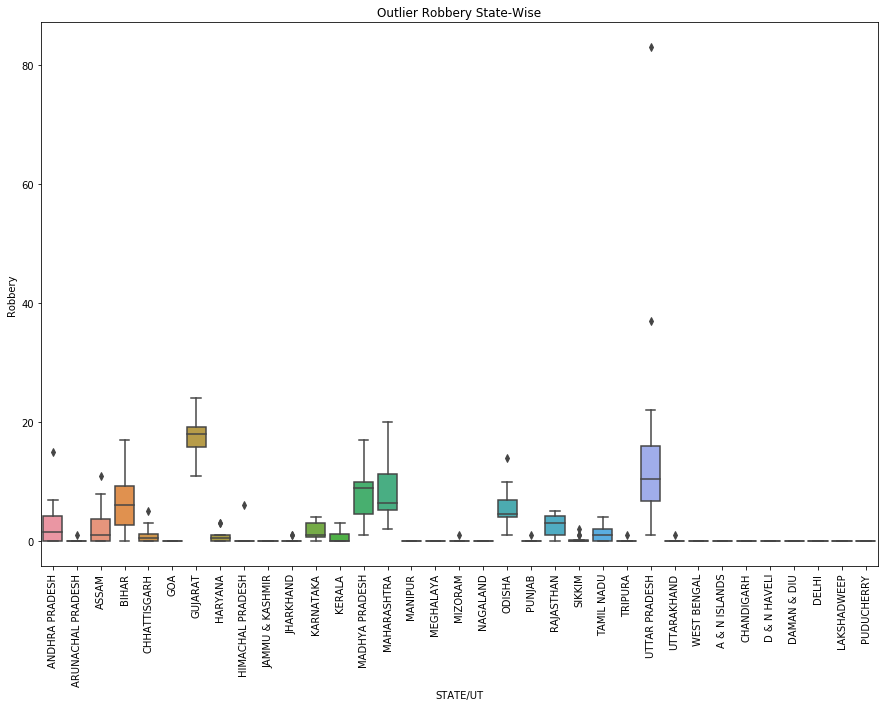

In [284]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x ='STATE/UT', y ='Robbery', data =df).set_title('Outlier Robbery State-Wise')
plt.xticks(rotation=90)
plt.show()

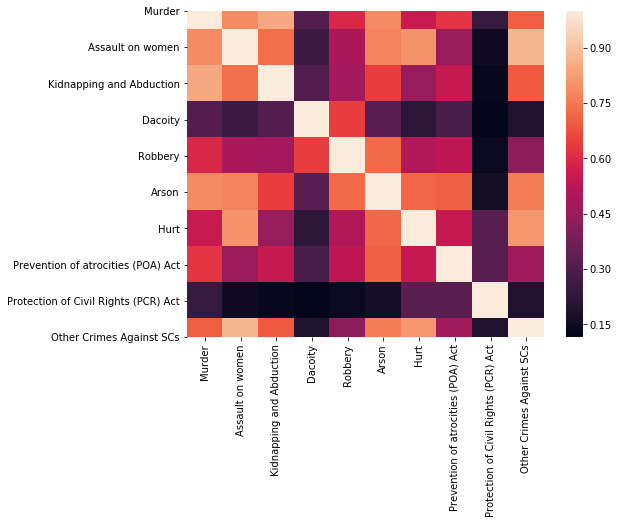

In [285]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

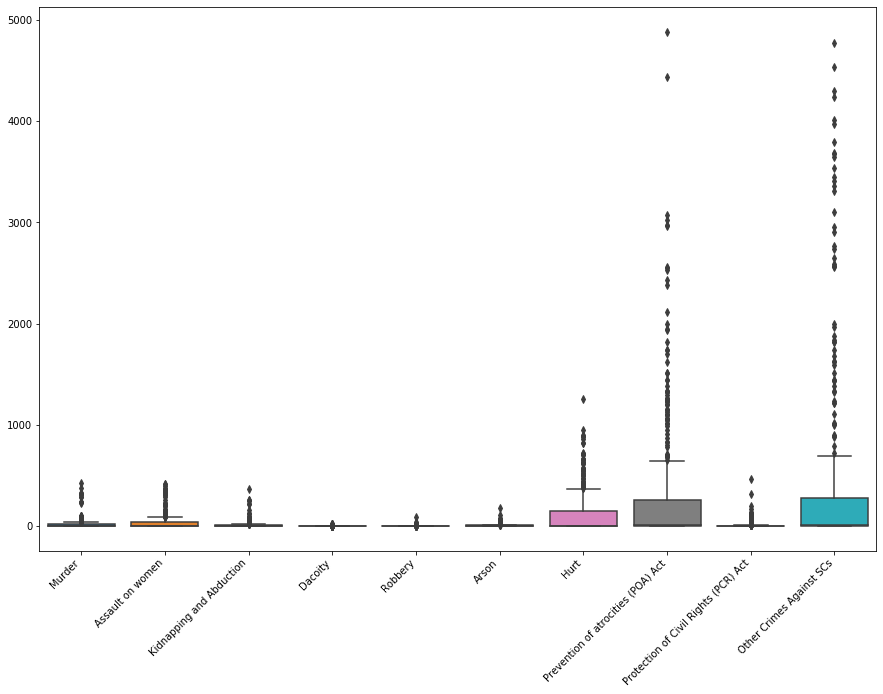

In [286]:
plt.figure(figsize=(15,10))
ax =sns.boxplot(data=df)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)

In [287]:
df.loc[:,'TotalCrime'] = df.sum(numeric_only=True, axis=1) #dataframe with year index
#df.loc['Column_Total']= df.sum(numeric_only=True, axis=0)

In [288]:
df_max = df.groupby(['STATE/UT']).max().sort_values(by='TotalCrime',ascending=False)
df_max

,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,TotalCrime
STATE/UT,,,,,,,,,,,
UTTAR PRADESH,423,412,363,16,83,178,821,4885,133,4296,10732
MADHYA PRADESH,102,412,69,3,17,62,1252,570,5,4771,7217
RAJASTHAN,66,216,51,1,5,76,636,2965,5,4536,5559
BIHAR,46,39,29,7,17,47,539,4436,113,661,4821
ANDHRA PRADESH,64,131,28,3,15,20,722,1737,459,1874,4504
KARNATAKA,38,43,16,3,4,5,262,1334,101,1013,2605
TAMIL NADU,39,34,16,5,4,18,422,1255,198,1105,2336
ODISHA,25,79,33,7,14,31,390,1943,12,694,2265
GUJARAT,34,45,35,11,24,16,340,434,16,566,1370


## Top 10 Crime State

In [289]:
top = df_max[:10]
top

,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,TotalCrime
STATE/UT,,,,,,,,,,,
UTTAR PRADESH,423,412,363,16,83,178,821,4885,133,4296,10732
MADHYA PRADESH,102,412,69,3,17,62,1252,570,5,4771,7217
RAJASTHAN,66,216,51,1,5,76,636,2965,5,4536,5559
BIHAR,46,39,29,7,17,47,539,4436,113,661,4821
ANDHRA PRADESH,64,131,28,3,15,20,722,1737,459,1874,4504
KARNATAKA,38,43,16,3,4,5,262,1334,101,1013,2605
TAMIL NADU,39,34,16,5,4,18,422,1255,198,1105,2336
ODISHA,25,79,33,7,14,31,390,1943,12,694,2265
GUJARAT,34,45,35,11,24,16,340,434,16,566,1370


In [290]:
df_up = df[df['STATE/UT'] == 'UTTAR PRADESH']
df_mp = df[df['STATE/UT'] == 'MADHYA PRADESH']
df_raj = df[df['STATE/UT'] == 'RAJASTHAN']

In [291]:
df_up.groupby('STATE/UT').max()

,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,TotalCrime
STATE/UT,,,,,,,,,,,
UTTAR PRADESH,423,412,363,16,83,178,821,4885,133,4296,10732


In [292]:
df_mp.groupby('STATE/UT').max()

,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,TotalCrime
STATE/UT,,,,,,,,,,,
MADHYA PRADESH,102,412,69,3,17,62,1252,570,5,4771,7217


In [293]:
df_raj.groupby('STATE/UT').max()

,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,TotalCrime
STATE/UT,,,,,,,,,,,
RAJASTHAN,66,216,51,1,5,76,636,2965,5,4536,5559


# Conclusion
- Uttar-Pradesh has maximum crime rate in 2001.
- TotalCrime rate in up is more than any other state in 2001,2002,2008,2009,2011.
- After UP, Mp has 7217 Crimes in 2002.
- Rajsthan has lot of crime rate in 2009,2010,2011 followed by UP and Mp.
- Maximum muder Was Done in the Year of 2001 in Uttar Pradesh
- 2012 Is Maximum Crime Year In UP, Mp And Rajstahn.
#### After Conclusion ,Crime State Are
1. Up
2. Rajsthan
2. Mp


#### Top 10 Crime State Are 
- Uttar Pradesh
- Madhya Preadesh 
- Rajasthan 
- Bihar
- Andhra Pradesh
- Karnataka
- TamilNadu
- Odisha
- Gujarat
- Maharashtra